In [1]:
import jupyter_black

jupyter_black.load()

# Ensemble Learning
This notebook explores the ensemble algorithms.
You should fill out the <span style="color:purple">**3 dots ...**</span> with the corresponding lines of codes. <br>

# Voting Classifiers
## Hard Voting

1. Split the moons dataset to train and test sets (90%, 10%)
2. Build a voting classifier consisting of a logistic regression, randomforest, and a kernelized SVM.

NB: Do not forget to import the needed classes and to set the random state hyperparameter to 7 for reproducibility.

In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=7)
# Split the moons dataset to train and test sets (90%, 10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# Build a voting classifier consisting of a logistic regression, randomforest, and a kernelized SVM (SVC)
voting_clf = VotingClassifier(
    estimators=[
        ("lr_clf", LogisticRegression(random_state=7)),
        ("rf_clf", RandomForestClassifier(random_state=7)),
        ("svc", SVC(random_state=2)),
    ]
)
# Fit the model to the train data
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_clf', LogisticRegression(random_state=7)),
                             ('rf_clf', RandomForestClassifier(random_state=7)),
                             ('svc', SVC(random_state=2))])

In [3]:
# Compute the mean accuracy on the test set using the score method
score_test = voting_clf.score(X_test, y_test)
print("Test accuracy of the VotingClassifier is:", score_test)

y_pred = voting_clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

for name, clf in voting_clf.named_estimators_.items():
    # Compute every estimator's mean accuracy on the test set
    score = clf.score(X_test, y_test)
    print(name, "=", score)

Test accuracy of the VotingClassifier is: 0.864
lr_clf = 0.864
rf_clf = 0.88
svc = 0.872


In [4]:
# Print the label of the eleventh test instance predicted by the VotingClassifier
index = 10
pred = voting_clf.predict([X_test[index]])
print("prediction of the voting classifier is:", pred)
# Print the label of the third test instance predicted by every classifier of the VotingClassifier
# index = 3
for name, clf in voting_clf.named_estimators_.items():
    pred = clf.predict([X_test[index]])
    print("prediction of ", name, "is:", pred)

prediction of the voting classifier is: [0]
prediction of  lr_clf is: [0]
prediction of  rf_clf is: [0]
prediction of  svc is: [1]


## Soft Voting
The previous method is called hard voting. <br>
Let us use the softvoting and compare the test accuracy.

To do this, update the voting_clf model's hyperparameters to consider soft voting. <br>
Ensure that all classifiers have `predict_proba`.<br>
Then Refit and re-compute the test accuracy.

In [5]:
# update the voting_clf hyperparameter of the voting_clf model

# voting_clf.voting = "soft"

voting_clf = VotingClassifier(
    estimators=[
        ("lr_clf", LogisticRegression(random_state=7)),
        ("rf_clf", RandomForestClassifier(random_state=7)),
        ("svc", SVC(probability=True, random_state=2)),
    ],
    voting="soft",
)

# SVC does not have a predict_proba method, thus we need to set its 'probability' hyperparam to True.

# voting_clf.named_estimators["svc"].probability = True

# voting_clf.named_estimators_["svc"].fit(X_train, y_train)

# Fit the model again on the train data
voting_clf.fit(X_train, y_train)
# Compute the test accuracy using the score method
test_accuracy = voting_clf.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.88


# Bagging and Pasting
## Bagging and Pasting in Scikit-Learn

Compare a decision tree and a bagging classifier with a decision tree as a base estimator.

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a bagging classifier with a decision tree as a base estimator, 500 estimators, and such that the maximum number
# of samples to train each estimator is 100 samples with replacement.
# set a random state for reproducibility
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=7),
    n_estimators=500,
    max_samples=100,
    oob_score=True,
)
# Fit the model to the train data generated in the Votinhg classifier section
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=7),
                  max_samples=100, n_estimators=500, oob_score=True)

In [7]:
# Initialize a a decision tree classifier with default hyperparameters
# set a random state for reproducibility
tree_clf = DecisionTreeClassifier(random_state=7)
# Fit the model to the train data generated in the Votinhg classifier section
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

Let us plot the decision boundaries of both models:

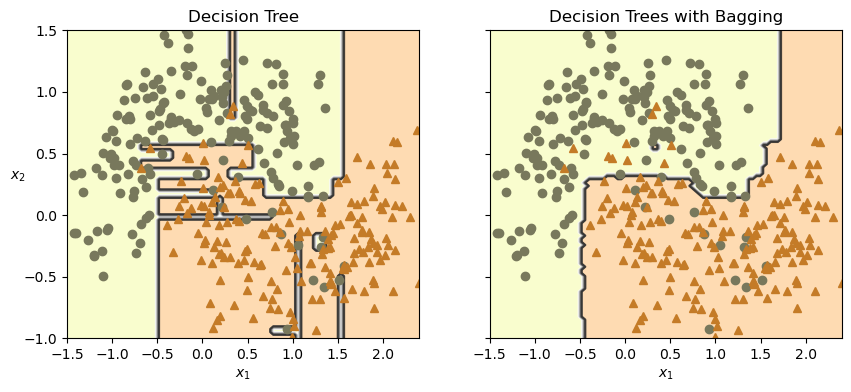

In [8]:
import matplotlib.pyplot as plt
from utils import plot_decision_boundary

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.show()

In [9]:
# Print the Out of bag evaluation score of the bagging classifier model
oob_score = bag_clf.oob_score_
print("OOB Score:", oob_score)

OOB Score: 0.9173333333333333


As you can see, you got an error! <br>
in Scikit-Learn, we can set the hyperparameter `oob_score=True`.
## Out-of-Bag evaluation

In [10]:
# Re-Initialize a bagging classifier with a decision tree as a base estimator, 500 estimators, such that the maximum number
# of samples to train each estimator is 100 samples with replacement and the out of bag evaluation is possible
# set a random state for reproducibility
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=7),
    n_estimators=500,
    oob_score=True,
    random_state=7,
)
# Fit the model to the train data generated in the Votinhg classifier section
bag_clf.fit(X_train, y_train)
# Print the Out of bag evaluation score of the bagging classifier model
print(f"OOB Score:{bag_clf.oob_score_}")

OOB Score:0.912


In [11]:
# Print the Out of bag decision function probabilities of the first 5 instances
# Print the Out of bag decision function probabilities of the first 5 instances
oob_decision_function = bag_clf.oob_decision_function_
print("OOB Decision Function Probabilities for the first 5 instances:")
print(oob_decision_function[:5])

OOB Decision Function Probabilities for the first 5 instances:
[[0.98907104 0.01092896]
 [0.07734807 0.92265193]
 [1.         0.        ]
 [1.         0.        ]
 [0.21393035 0.78606965]]


Compute the test accuracy of the `bag_clf` model

In [12]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = bag_clf.predict(X_test)
# compute the accuracy score
accuracy_score(y_pred, y_test)

0.88

If you randomly draw one instance from a dataset of size _n_, each instance in the dataset obviously has probability 1/_n_ of getting picked, and therefore it has a probability 1 – 1/_n_ of _not_ getting picked. If you draw _n_ instances with replacement, all draws are independent and therefore each instance has a probability (1 – 1/_n_)<sup>_n_</sup> of _not_ getting picked. Now let's use the fact that exp(_x_) is equal to the limit of (1 + _x_/_n_)<sup>_n_</sup> as _n_ approaches infinity (_x_/$\infty$ tends to 0); here $x=-1$. So if _n_ is large, the ratio of out-of-bag instances will be about exp(–1) ≈ 0.37. So roughly 63% (1 – 0.37) will be sampled.

In [13]:
import numpy as np

print(1 - (1 - 1 / 1000) ** 1000)
print(1 - np.exp(-1))

0.6323045752290363
0.6321205588285577


# Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest of 500 trees, 16 max_leaf_nodes, and a random_state
rnd_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1
)
# Fit the model to the train data
rnd_clf.fit(X_train, y_train)
# predict on the test set
y_pred_rf = rnd_clf.predict(X_test)

Since a Random Forest is equivalent to a bag of decision trees, let us create a baggingclassifier of 500 decision trees with 16 max_leaf_nodes and check if both model will predict the same values on the test set.

In [15]:
# Initialize a baggingclassifier of 500 decision trees with 16 max_leaf_nodes
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_leaf_nodes=16, max_features="sqrt"),
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
)
# Fit the model to the train data
bag_clf.fit(X_train, y_train)
# predict on the test set
y_pred_bag = bag_clf.predict(X_test)

In [16]:
# verifiying that the predictions are identical
np.all(y_pred_bag == y_pred_rf)  # same predictions

True

## Feature Importance

In [17]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
# Initialize a random forest of 500 trees and a random state
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=7)
# fit the data
rnd_clf.fit(X_train, y_train)
# get the feature importances identified by the model
features_importances = rnd_clf.feature_importances_
for score, name in zip(features_importances, iris.data.columns):
    print(round(score, 2), name)

0.44 sepal length (cm)
0.56 sepal width (cm)


In [18]:
# X_mnist.shape, 28 * 28

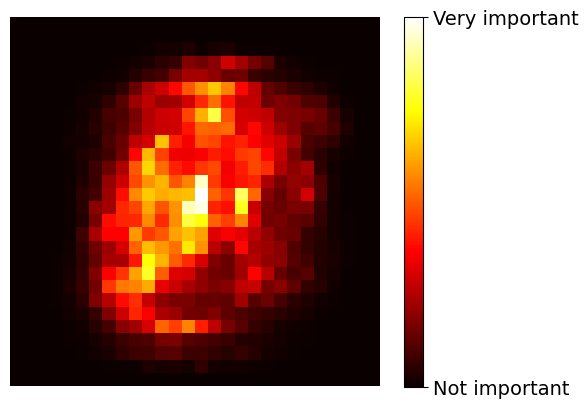

In [19]:
from sklearn.datasets import fetch_openml

# loading the MNIST dataset, it consists of 70 000 images, each of size 28x28
X_mnist, y_mnist = fetch_openml(
    "mnist_784", return_X_y=True, as_frame=False, parser="auto"
)

# Initialize a random fores with 100 trees and a random state
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=7)
# fit the model on X_mnist and y_mnist
rnd_clf.fit(X_mnist, y_mnist)
# get the feature importances identified by the model
features_importances = rnd_clf.feature_importances_

# reshaping the features_importances as an image, here we are checking the importance of each pixel in the classification
heatmap_image = features_importances.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(
    ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()]
)
cbar.ax.set_yticklabels(["Not important", "Very important"], fontsize=14)
plt.axis("off")
plt.show()

From the previous figure, we can clearly see that the edge pixels are useless (they are black, i.e., not important), In other terms, if we could crop the images and remove these edges, the classification model's performace will stay intact.

# Boosting
## AdaBoost
1)Initialize an AdaBoost classifier having:
- a decision tree of max depth 1 as its base estimator
- 30 estimators
- a learning rate of 0.5
- a random state

In [20]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the adaboost model as detailed above
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=30,
    learning_rate=0.5,
    random_state=7,
)
# 2)Fit the model
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=7)

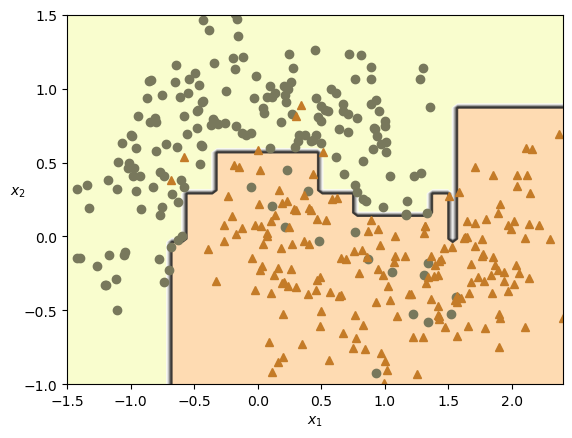

In [21]:
# 3)Plot its decision boundary using the function `plot_decision_boundary_for_bagging` imported from `utils.py`
plot_decision_boundary(ada_clf, X_train, y_train)

## Gradient Boosting
### A manual implementation of Gradient Boosting

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Generating a quadratic dataset
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

# Initialize a decision tree regressor of max depth 2 and random state to some value
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=7)
# Fit the model to the data
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=7)

In [23]:
# Compute y2 such as y2 are the residual errors made by the previous tree, y2 = y-predictions on X
predictions = tree_reg1.predict(X)
y2 = y - predictions
# Initialize a second decision tree regressor of max depth 2 and random state to another value
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
# Fit the 2nd model to the data
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [24]:
# Compute y3 such as y3 are the residual errors made by the second tree
predictions = tree_reg2.predict(X)
y3 = y2 - predictions
# Initialize a third decision tree regressor of max depth 2 and random state to another value
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=666)
# Fit the 2nd model to the data
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=666)

In [25]:
X_new = np.array([[-0.4], [0.0], [0.5]])
# predict the label of X_new
labels_new = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(labels_new)

[0.49484029 0.04021166 0.75026781]


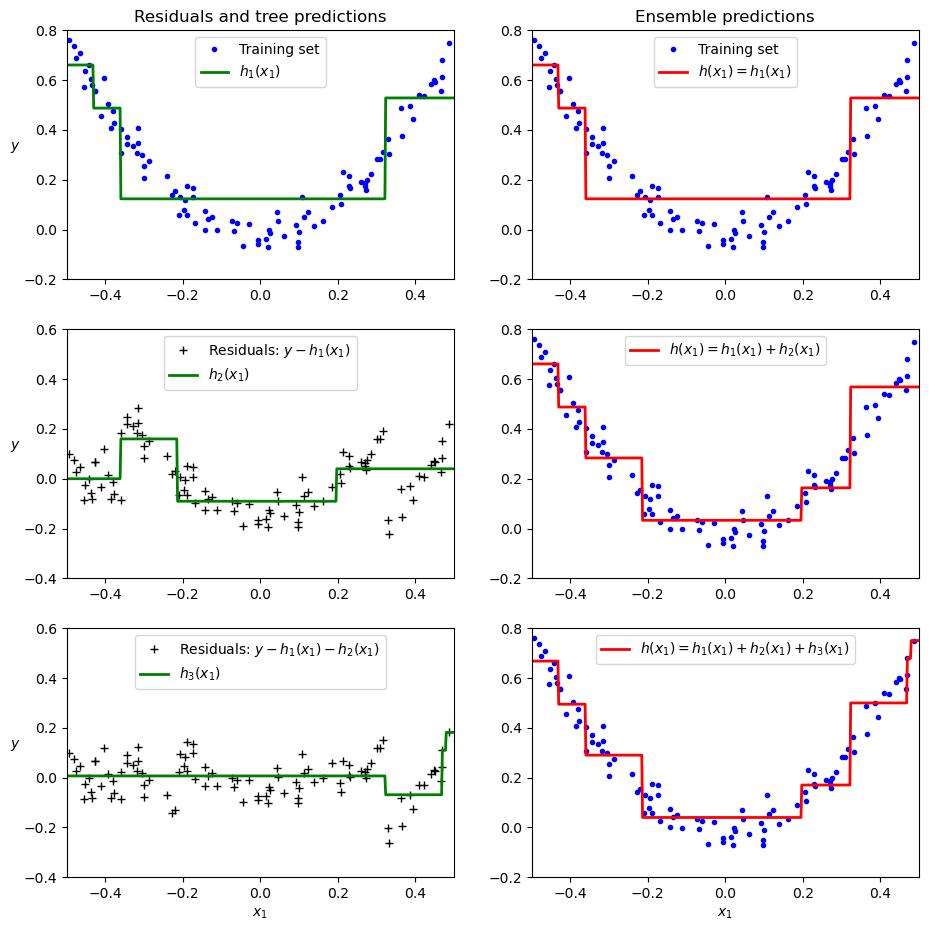

In [26]:
from utils import plot_predictions_ensemble

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions_ensemble(
    [tree_reg1],
    X,
    y,
    axes=[-0.5, 0.5, -0.2, 0.8],
    style="g-",
    label="$h_1(x_1)$",
    data_label="Training set",
)
plt.ylabel("$y$  ", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions_ensemble(
    [tree_reg1],
    X,
    y,
    axes=[-0.5, 0.5, -0.2, 0.8],
    style="r-",
    label="$h(x_1) = h_1(x_1)$",
    data_label="Training set",
)
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions_ensemble(
    [tree_reg2],
    X,
    y2,
    axes=[-0.5, 0.5, -0.4, 0.6],
    style="g-",
    label="$h_2(x_1)$",
    data_style="k+",
    data_label="Residuals: $y - h_1(x_1)$",
)
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions_ensemble(
    [tree_reg1, tree_reg2],
    X,
    y,
    axes=[-0.5, 0.5, -0.2, 0.8],
    style="r-",
    label="$h(x_1) = h_1(x_1) + h_2(x_1)$",
)

plt.subplot(3, 2, 5)
plot_predictions_ensemble(
    [tree_reg3],
    X,
    y3,
    axes=[-0.5, 0.5, -0.4, 0.6],
    style="g-",
    label="$h_3(x_1)$",
    data_style="k+",
    data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$",
)
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions_ensemble(
    [tree_reg1, tree_reg2, tree_reg3],
    X,
    y,
    axes=[-0.5, 0.5, -0.2, 0.8],
    style="r-",
    label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$",
)
plt.xlabel("$x_1$")


plt.show()

In [27]:
import os

os.cpu_count()

8

## Sklearn's gradient boosting regressor

In [28]:
# Generating a quadratic dataset
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize a gradient boosting regressor of max depth 2, 3 estimators, a learning rate = 1.0, and a random_state
gbrt = GradientBoostingRegressor(
    max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42
)
# Fit the model to X, y
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [30]:
# Initialize a gradient boosting regressor of max depth 2, 500 estimators, learning rate = 0.05,
# the max number of training iterations allowed without any change is 10, and a random_state
gbrt_best = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=500,
    learning_rate=0.05,
    random_state=42,
    n_iter_no_change=10,
)
# Fit the model to X, y
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [31]:
# print the number of estimators gbrt_best has kept out of the 500 estimators we have set
print("Number of estimators kept:", gbrt_best.n_estimators_)

Number of estimators kept: 92


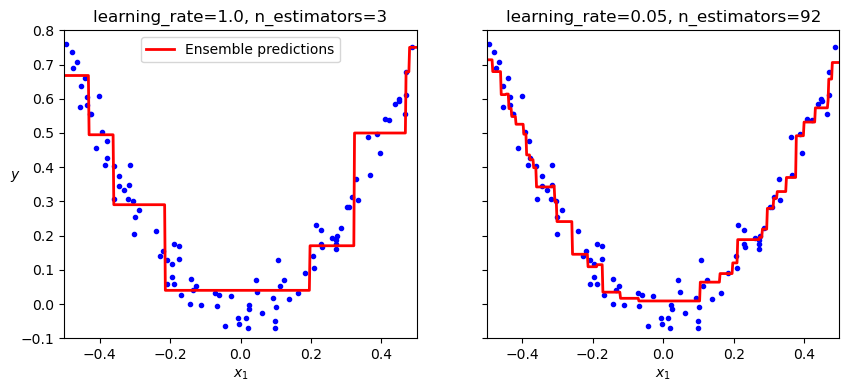

In [32]:
# Let us compare both models
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions_ensemble(
    [gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-", label="Ensemble predictions"
)
plt.title(f"learning_rate={gbrt.learning_rate}, " f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions_ensemble([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")
plt.title(
    f"learning_rate={gbrt_best.learning_rate}, "
    f"n_estimators={gbrt_best.n_estimators_}"
)
plt.xlabel("$x_1$")

plt.show()

From the figure above, we can see that `gbrt_best` estimates better the quadratic function than `gbrt`; recall that our data is generated from a quadratic function.
## Histogram-based Gradient Boosting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd

# Reading csv data with pandas
housing = pd.read_csv(r"./data/housing.csv")

# Split the housing dataframe to train 80% and test 20%
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# the label is the median_house_value
housing_labels = train_set["median_house_value"]
# Drop the label column
housing = train_set.drop("median_house_value", axis=1)

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

# creating a pipeline of 2 steps: 1) data processing, 2) ML modeling
hgb_reg = make_pipeline(
    # this data preprocessing consists of encoding the column ocean_proximity
    # NB: make_column_transformer transforms this columns and will make it the first column
    # thus it changes the order of the columns
    make_column_transformer(
        (OrdinalEncoder(), ["ocean_proximity"]), remainder="passthrough"
    ),
    # add a histogram based gradient boosting model with the categorical_features hyperparameter set
    # to the index of the first column because make_column_transformer encoded the categorical feature 'ocean_proximity'
    # and made it the first column.
    HistGradientBoostingRegressor(categorical_features=[0]),
)
hgb_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['ocean_proximity'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[0]))])

In [36]:
# extra code – evaluate the RMSE stats for the hgb_reg model

from sklearn.model_selection import cross_val_score

# use a 10-fold cross validation to train the hgb_reg pipeline with the neg_root_mean_squared_error as a scoring metric
hgb_rmses = -cross_val_score(
    hgb_reg,
    housing,
    housing_labels,
    cv=10,
    n_jobs=-1,
    verbose=3,
    scoring="neg_root_mean_squared_error",
)
pd.Series(hgb_rmses).describe()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ........................... score: (test=-46086.490) total time=   0.3s
[CV] END ........................... score: (test=-47729.693) total time=   0.3s
[CV] END ........................... score: (test=-49263.430) total time=   0.3s
[CV] END ........................... score: (test=-48432.072) total time=   0.3s
[CV] END ........................... score: (test=-49954.938) total time=   0.3s
[CV] END ........................... score: (test=-46162.811) total time=   0.2s
[CV] END ........................... score: (test=-44558.578) total time=   0.3s
[CV] END ........................... score: (test=-49535.164) total time=   0.3s
[CV] END ........................... score: (test=-49496.918) total time=   0.2s
[CV] END ........................... score: (test=-47903.073) total time=   0.2s


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


count       10.000000
mean     47912.316781
std       1797.775407
min      44558.577503
25%      46554.531910
50%      48167.572508
75%      49438.546047
max      49954.938485
dtype: float64

# Stacking
- Create a stacking classifier consisting of:
    - 3 estimators: a logistic regression, a randomforest, and a kernelized SVM
    - a final estimator: a randomforest
- Set the random state hyperparameter and the number of cross validation folds to 5
- Fit the model
- Test it on the test set (mean accuracy)

In [37]:
from sklearn.ensemble import StackingClassifier

# Create a stacking classifier consisting of:
#     - 3 estimators: a logistic regression, a randomforest, and a kernelized SVM
#     - a final estimator: a randomforest
# Set the random state hyperparameter to all the models
# and the number of cross validation folds to 5
stacking_clf = StackingClassifier(
    estimators=[
        ("lr_clf", LogisticRegression(random_state=42)),
        ("rf_clf", RandomForestClassifier(random_state=42)),
        ("svc", SVC(random_state=42)),
    ],
    cv=5,
)
# Fit the model to X_train, y_train defined at the begining of this notebook (the make_moons dataset)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr_clf', LogisticRegression(random_state=42)),
                               ('rf_clf',
                                RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))])

In [38]:
# compute the accuracy on the test set using the score method
y_pred = stacking_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.888

## Voting Classifier
Load the MNIST data and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing).

In [39]:
# loading the MNIST dataset, it consists of 70 000 images, each of size 28x28
X_mnist, y_mnist = fetch_openml(
    "mnist_784", return_X_y=True, as_frame=False, parser="auto"
)

In [40]:
set(y_mnist)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [41]:
type(y_mnist[0])

str

In [42]:
from sklearn.model_selection import train_test_split

X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X_mnist, y_mnist, test_size=1 / 7
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, test_size=1 / 6
)

In [43]:
len(X_train), len(X_valid), len(X_test)

(50000, 10000, 10000)

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [45]:
# Initialize a random forest with 100 trees + random_state
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Initialize an extra tree model with 100 trees + random_state
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
# Initialize a linear SVC with max_iter=100, tol=20 + random_state
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42, dual="auto")
# Initialize a multilayer perceptron model + random_state
mlp_clf = MLPClassifier(random_state=42)

In [46]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    # fit each estimator to the train dataset
    estimator.fit(X_train, y_train)
    # compute the validation score using the score method
    val_score = estimator.score(X_test, y_test)
    print("\t the validation accuracy is:", val_score)

Training the RandomForestClassifier(random_state=42)
	 the validation accuracy is: 0.9678
Training the ExtraTreesClassifier(random_state=42)
	 the validation accuracy is: 0.9714
Training the LinearSVC(dual='auto', max_iter=100, random_state=42, tol=20)
	 the validation accuracy is: 0.0916
Training the MLPClassifier(random_state=42)
	 the validation accuracy is: 0.9594


The linear SVM performs the worst among the classifiers. <br>
However, let's keep it for now since it may improve the voting classifier's performance.

Next, we will try to combine \[the classifiers\] into an ensemble; we are expecting that it will outperform them all on the validation set, using a soft or hard voting classifier.

In [47]:
from sklearn.ensemble import VotingClassifier

In [48]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [49]:
# Initialize a voting classifier with the 'named_estimators' created in the previous cell
voting_clf = VotingClassifier(estimators=named_estimators, voting="hard")
# Fit the model to the train data
voting_clf.fit(X_train, y_train)
# Compute the validation score using the score method
val_score = voting_clf.score(X_test, y_test)
print("The validation score of the ensemble is:", val_score)

The validation score of the ensemble is: 0.9701


The `VotingClassifier` made a clone of each classifier, and it trained the clones using class indices as the labels, not the original class names.

 The original class names are numbers represented as strings, not integers, for the simple reason: we do not want the model to think that there is an ordinal regression here, the class '1' is independent from '2' and the error if we confuse class '1' with '2' should be similar to when we confuse it with '7', not less.

 Therefore, to evaluate these clones we need to provide class indices as well. To convert the classes to class indices, we can use a `LabelEncoder`:

In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_valid_encoded = encoder.fit_transform(y_valid)

However, in the case of MNIST, it's simpler to just convert the class names to integers, since the digits match the class ids:

In [51]:
y_valid_encoded = y_valid.astype(np.int64)

Now let's evaluate the classifier clones:

In [52]:
for estimator in voting_clf.estimators_:
    # Compute the validation score using the score method now with y_valid_encoded
    score = estimator.score(X_valid, y_valid_encoded)
    print("estimator:", estimator, "- val score:", score)

estimator: RandomForestClassifier(random_state=42) - val score: 0.9685
estimator: ExtraTreesClassifier(random_state=42) - val score: 0.9733
estimator: LinearSVC(dual='auto', max_iter=100, random_state=42, tol=20) - val score: 0.0963
estimator: MLPClassifier(random_state=42) - val score: 0.9626


Let's remove the SVM to see if performance improves. It is possible to remove an estimator by setting it to `"drop"` using `set_params()` like this:

In [53]:
voting_clf.set_params(svm_clf="drop")

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf', 'drop'),
                             ('mlp_clf', MLPClassifier(random_state=42))])

This updated the list of estimators:

In [54]:
voting_clf.estimators

[('random_forest_clf', RandomForestClassifier(random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(random_state=42)),
 ('svm_clf', 'drop'),
 ('mlp_clf', MLPClassifier(random_state=42))]

However, it did not update the list of **_trained_** estimators:

In [55]:
voting_clf.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(dual='auto', max_iter=100, random_state=42, tol=20),
 MLPClassifier(random_state=42)]

In [56]:
voting_clf.named_estimators_

{'random_forest_clf': RandomForestClassifier(random_state=42),
 'extra_trees_clf': ExtraTreesClassifier(random_state=42),
 'svm_clf': LinearSVC(dual='auto', max_iter=100, random_state=42, tol=20),
 'mlp_clf': MLPClassifier(random_state=42)}

So we can either fit the `VotingClassifier` again, or just remove the SVM from the list of trained estimators, both in `estimators_` and `named_estimators_`:

In [57]:
svm_clf_trained = voting_clf.named_estimators_.pop("svm_clf")
voting_clf.estimators_.remove(svm_clf_trained)

Now let's evaluate the `VotingClassifier` again:

In [58]:
# Compute the validation score of voting_clf now that we have removed SVM
for estimator in voting_clf.estimators_:
    score = estimator.score(X_valid, y_valid_encoded)
    print("estimator:", estimator, "- val score:", score)

estimator: RandomForestClassifier(random_state=42) - val score: 0.9685
estimator: ExtraTreesClassifier(random_state=42) - val score: 0.9733
estimator: MLPClassifier(random_state=42) - val score: 0.9626


A bit better! The SVM was hurting performance. Now let's try using a soft voting classifier. We do not actually need to retrain the classifier, we can just set `voting` to `"soft"`:

In [59]:
voting_clf.voting = "soft"

In [60]:
# Compute the validation score of voting_clf now that we have removed SVM and using soft voting (using the score method)
voting_clf.score(X_valid, y_valid)
print("- val score:", score)
for estimator in voting_clf.estimators_:
    score = estimator.score(X_valid, y_valid_encoded)
    print("estimator:", estimator, "- val score:", score)

- val score: 0.9626
estimator: RandomForestClassifier(random_state=42) - val score: 0.9685
estimator: ExtraTreesClassifier(random_state=42) - val score: 0.9733
estimator: MLPClassifier(random_state=42) - val score: 0.9626


It seems that here hard voting wins.

Now, since we have found \[an ensemble that performs better than the individual predictors\], let us try it on the test set and see how much better does it perform compared to the individual classifiers?

First, we will reset the `voting` hyperparameter to `hard`.

In [61]:
# set the `voting` hyperparameter to `hard`
voting_clf.voting = "hard"
# Compute the test score of voting_clf using the score method
voting_clf.score(X_test, y_test)
print("- val score:", score)

- val score: 0.9626


In [62]:
# Now let us check the test score per individual estimator
Int_y_test = y_test.astype(np.int64)
for estimator in voting_clf.estimators_:
    # Compute the test score of estimator using the score method and Int_y_test instead of simply y_test
    test_score = estimator.score(X_test, Int_y_test)
    print("estimator:", estimator, "- test scotre:", test_score)

estimator: RandomForestClassifier(random_state=42) - test scotre: 0.9678
estimator: ExtraTreesClassifier(random_state=42) - test scotre: 0.9714
estimator: MLPClassifier(random_state=42) - test scotre: 0.9594


The voting classifier reduced the error rate of the best model (extra tree here, with error rate = 100-96.99%= 3%) from about 3% to 2.93%, which means 2.33% less errors ((3-2.93)/3*100=2.33%).

## Stacking Ensemble

Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions.

Each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image's class.

Train a classifier on this new training set.

In [63]:
# we are doing stacking, we need the current predictions to feed them to a blender model to predict the final correct predictions
# thus, we are creating an empty matrix of number of rows = number of validation data points
# and number of columns = number of estimators
X_valid_predictions = np.empty((len(X_valid), len(estimators)), dtype=object)

for index, estimator in enumerate(estimators):
    # predict using estimator the y_valid
    y_valid_ = estimator.predict(X_valid)
    X_valid_predictions[:, index] = y_valid_

In [64]:
X_valid_predictions

array([['0', '0', '0', '0'],
       ['9', '9', '0', '9'],
       ['2', '2', '0', '2'],
       ...,
       ['6', '6', '0', '6'],
       ['1', '1', '0', '1'],
       ['2', '2', '0', '2']], dtype=object)

In [65]:
# Initialize a random forest with 200 trees, out-of-bag evaluation to true, + random_state
# this is the blender
rnd_forest_blender = RandomForestClassifier(
    n_estimators=200, oob_score=True, random_state=42
)
# fit the model to the previous matrix of validation predictions gathered from the estimators and y_valid
rnd_forest_blender.fit(X_valid_predictions, y_valid)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [66]:
# print the out of bag evaluation score of the blender
print(f"OOB Score:{rnd_forest_blender.oob_score_}")

OOB Score:0.9732


You could fine-tune this blender or try other types of blenders (e.g., an `MLPClassifier`), then select the best one using cross-validation.

Now that we have trained a  stacking ensemble (a blender with the classifiers), let's evaluate the ensemble on the test set.

For each image in the test set, we make predictions with all our classifiers, then we feed the predictions to the blender to get the ensemble's predictions.

Let us compare its performance to the voting classifier we trained earlier.

In [67]:
# Similarly like before, we are creating an empty matrix of number of rows = number of test data points
# and number of columns = number of estimators
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=object)

for index, estimator in enumerate(estimators):
    # predict the y_test_ using estimator
    y_test_ = estimator.predict(X_test)
    X_test_predictions[:, index] = y_test_

In [68]:
# Now predict the final predictions using the blender
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [69]:
y_pred

array(['2', '8', '0', ..., '8', '7', '1'], dtype=object)

In [70]:
# compute the test accuracy score
accuracy_score(y_pred, y_test)

0.9704

This stacking ensemble does not perform as well as the voting classifier we trained earlier (96.71% < 97.07%).

Now let us try again using this time a `StackingClassifier` instead and let us check the performance.

Since `StackingClassifier` uses K-Fold cross-validation, we don't need a separate validation set, so let's join the training set and the validation set into a bigger training set.

In [71]:
X_train_full = np.append(X_train, X_valid, axis=0)
y_train_full = np.append(y_train, y_valid, axis=0)

In [72]:
X_train_full.shape, y_train_full.shape

((60000, 784), (60000,))

Now let's create and train the stacking classifier on the full training set:

**NB**: the following cell will take quite a while to run (15-30 minutes depending on your hardware), as it uses K-Fold validation with 5 folds by default. It will train the 4 classifiers 5 times each on 80% of the full training set to make the predictions, plus one last time each on the full training set, and lastly it will train the final model on the predictions. That's a total of 25 models to train!

In [73]:
# Initialize a stacking classifier with the list 'named_estimators', and the final estimator 'rnd_forest_blender'
stack_clf = StackingClassifier(
    estimators=named_estimators,
    final_estimator=rnd_forest_blender,
    cv=5,
    n_jobs=-1,
    verbose=2,
)
# Fit the model of the full train dataset
stack_clf.fit(X_train_full, y_train_full)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.6s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   50.0s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.4s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | ela

StackingClassifier(cv=5,
                   estimators=[('random_forest_clf',
                                RandomForestClassifier(random_state=42)),
                               ('extra_trees_clf',
                                ExtraTreesClassifier(random_state=42)),
                               ('svm_clf',
                                LinearSVC(dual='auto', max_iter=100,
                                          random_state=42, tol=20)),
                               ('mlp_clf', MLPClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=200,
                                                          oob_score=True,
                                                          random_state=42),
                   n_jobs=-1, verbose=2)

In [74]:
# compute the test accuracy using the score method
accuracy_score(stack_clf.predict(X_test), y_test)

0.9785

The `StackingClassifier` significantly outperforms the custom stacking implementation we tried earlier. This is for mainly two reasons:

* Since we could reclaim the validation set, the `StackingClassifier` was trained on a larger dataset.
* It used `predict_proba()` if available, or else `decision_function()` if available, or else `predict()`. This gave the blender much more nuanced inputs to work with.